In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataFrameVerisi1 =pd.read_csv("1.seans.csv")
dataFrameVerisi1

,period,demand,marketPrice,oldMarketPrace,player kazanma,Player1,Player2,Player3,Player4,Player5,...,to_build_period,operation_period,fc_Urn,fc_Coal,fc_Gas,fc_Bio,cc_Urn,cc_Coal,cc_Gas,cc_Bio
0,1,26640,155,0,1,0,0,0,0,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
1,1,26640,155,0,1,0,0,0,0,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
2,1,26640,155,0,1,0,0,0,0,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
3,1,26640,155,0,1,0,0,0,0,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
4,1,26640,155,0,1,0,0,0,0,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,32,246444,200,200,1,0,0,1,0,0,...,2.0,7.0,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724
3973,32,246444,200,200,1,1,0,0,0,0,...,NaN,NaN,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724
3974,32,246444,200,200,1,0,0,1,0,0,...,NaN,NaN,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724
3975,32,246444,200,200,1,0,0,1,0,0,...,NaN,NaN,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724


In [3]:
dataFrameVerisi1.describe()
#dataFrameVerisi1.describe().to_excel("mpCorr/4.seans_describe.xlsx")

,period,demand,marketPrice,oldMarketPrace,player kazanma,Player1,Player2,Player3,Player4,Player5,...,to_build_period,operation_period,fc_Urn,fc_Coal,fc_Gas,fc_Bio,cc_Urn,cc_Coal,cc_Gas,cc_Bio
count,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.000000,...,2675.000000,2675.000000,3977.000000,3977.000000,3977.000000,3977.000000,3977.0,3977.000000,3977.000000,3977.000000
mean,16.149862,97944.161428,108.382198,114.139552,0.718632,0.014081,0.027408,0.045763,0.019361,0.000754,...,2.457570,7.833271,1.596176,8.705675,71.890536,4.031149,0.0,4.346612,8.372928,0.673257
std,9.007607,62127.362520,83.283085,82.686269,0.449723,0.117840,0.163288,0.208997,0.137809,0.027458,...,1.015573,1.177519,0.544338,3.600398,36.251900,0.667340,0.0,1.795980,2.653632,0.112071
min,1.000000,26640.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,6.000000,1.000000,4.000000,9.000000,3.000000,0.0,2.000000,2.000000,0.500000
25%,8.000000,44795.000000,16.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,7.000000,1.000000,4.100000,32.020000,3.220000,0.0,2.047900,7.120900,0.536800
50%,17.000000,83025.000000,139.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,7.000000,1.630000,10.160000,99.990000,4.440000,0.0,5.071500,9.999900,0.742000
75%,23.000000,131694.000000,200.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,9.000000,1.930000,11.480000,99.990000,4.490000,0.0,5.730900,9.999900,0.749800
max,32.000000,246444.000000,200.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,10.000000,3.120000,15.320000,99.990000,5.220000,0.0,7.646000,9.999900,0.872400


In [4]:
mPCorr = dataFrameVerisi1.corr() #kolerasyon ileşkisi
#mPCorr.to_excel("mpCorr/4.seans_korelasyon.xlsx")
mPCorr

,period,demand,marketPrice,oldMarketPrace,player kazanma,Player1,Player2,Player3,Player4,Player5,...,to_build_period,operation_period,fc_Urn,fc_Coal,fc_Gas,fc_Bio,cc_Urn,cc_Coal,cc_Gas,cc_Bio
period,1.000000,0.963767,0.266836,0.235391,0.184503,0.126437,-0.120097,0.015728,-0.027462,0.042252,...,0.109457,0.003308,0.966386,0.971406,0.877272,0.925585,NaN,0.971416,0.781733,0.925336
demand,0.963767,1.000000,0.444704,0.392886,0.288854,0.131792,-0.115387,0.037908,-0.032736,0.051673,...,0.133483,0.031170,0.975355,0.911600,0.730452,0.824143,NaN,0.911642,0.617797,0.823648
marketPrice,0.266836,0.444704,1.000000,0.772703,0.586379,0.055012,-0.068016,-0.022766,-0.020608,0.030229,...,0.058009,0.018632,0.348456,0.204866,-0.069778,0.032174,NaN,0.205206,-0.273884,0.031836
oldMarketPrace,0.235391,0.392886,0.772703,1.000000,0.382155,0.050107,-0.062761,-0.014574,-0.015732,0.028534,...,0.053222,0.022443,0.288568,0.146597,-0.083119,-0.005917,NaN,0.146969,-0.239526,-0.005988
player kazanma,0.184503,0.288854,0.586379,0.382155,1.000000,0.017828,0.026266,-0.036903,-0.050056,0.017192,...,0.079257,0.071544,0.222464,0.135966,-0.039471,0.046197,NaN,0.136147,-0.151963,0.045976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fc_Bio,0.925585,0.824143,0.032174,-0.005917,0.046197,0.106488,-0.120956,-0.003605,-0.029614,0.033443,...,0.111323,0.000506,0.902448,0.976770,0.972297,1.000000,NaN,0.976727,0.873841,0.999997
cc_Urn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_Coal,0.971416,0.911642,0.205206,0.146969,0.136147,0.117640,-0.131021,-0.003501,-0.029502,0.039259,...,0.110230,0.000259,0.959711,1.000000,0.933856,0.976727,NaN,1.000000,0.797640,0.976588
cc_Gas,0.781733,0.617797,-0.273884,-0.239526,-0.151963,0.073281,-0.054314,0.029584,-0.023909,0.016848,...,0.076599,-0.021898,0.671668,0.797816,0.908358,0.873841,NaN,0.797640,1.000000,0.874011


In [5]:
# marketPrice üzerinde etkisi olmayanlar dataframe den silinmiştir. 
mPCorr=dataFrameVerisi1.drop(["quant","Player1","Player2","Player3","Player4","Player5","Player6","Player7","Player8","Player9","Player10","Player11","Player12","Player13","Player14","Player15","Player16","Player17","Player18","Player19","Player20","Player21","Player22","Player23","Player24","Player25","Player26","Player27","Player28","Player29","Player30","Player31","Player32","Player33","Player34","Player34","Player35","Player36","Player37","Player38","Player39","pltNum","cc_Urn"] ,axis=1) 
mPCorr1 = mPCorr.corr()["marketPrice"].sort_values()
#mPCorr1.to_excel("mPCorr/4.seans_MP_kolerasyon.xlsx")
mPCorr1

cc_Gas             -0.273884
Geothermal         -0.181278
CCGT               -0.106152
Coal               -0.105788
CO_Emission        -0.089871
fc_Gas             -0.069778
capacityFactor     -0.062895
Hydro              -0.026643
efficiency         -0.020085
Solar              -0.014229
capacity            0.016874
Wind                0.017102
operation_period    0.018632
cc_Bio              0.031836
fc_Bio              0.032174
Nuclear             0.050776
to_build_period     0.058009
Bioenergy           0.062499
investmentCost      0.094313
fc_Coal             0.204866
cc_Coal             0.205206
period              0.266836
fc_Urn              0.348456
player_bid_price    0.428553
demand              0.444704
player kazanma      0.586379
oldMarketPrace      0.772703
marketPrice         1.000000
Name: marketPrice, dtype: float64

In [6]:
mPCorr.isnull().sum()

period                 0
demand                 0
marketPrice            0
oldMarketPrace         0
player kazanma         0
player_bid_price       0
Bioenergy              0
CCGT                   0
Coal                   0
Geothermal             0
Hydro                  0
Nuclear                0
Solar                  0
Wind                   0
capacity            1302
investmentCost      1302
efficiency          1302
capacityFactor      1302
CO_Emission         1302
to_build_period     1302
operation_period    1302
fc_Urn                 0
fc_Coal                0
fc_Gas                 0
fc_Bio                 0
cc_Coal                0
cc_Gas                 0
cc_Bio                 0
dtype: int64

In [7]:
mPCorr= mPCorr.dropna()

In [8]:
from sklearn.model_selection import train_test_split
""" Not: x değişkeni herkes tarafından bilinen demand, yakıt fiyatları vb. olmalıdır. Fiyat tahmini yapılacak seneryoda 
oyuncuların verdidiği teklikler bilinenler içerisinde olmadığında x parametresine atanmamalıdır.
x bağımsız değişkenleri tek tek girilmelidir. Burada daha önce oluşturulan kolerasyon ve descipe çıktıları incelenerek 
karar verilebilir. Sonuca etkisi olmadığı düşünülen kısımların eklenmemesi tercih edilmelidir.
y = wx + b
y -> label """
y = mPCorr["marketPrice"].values
# x -> feature (özellik)
x = mPCorr[["oldMarketPrace","player kazanma","player_bid_price","demand","fc_Urn","period","cc_Coal","fc_Coal","investmentCost","Bioenergy"]].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [9]:
x_train.shape

(1792, 10)

In [10]:
x_test.shape

(883, 10)

In [11]:
y_train.shape

(1792,)

In [12]:
y_test.shape

(883,)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
from sklearn import ensemble
'''params = {
    'n_estimators': 100,
    'max_depth': 1,
    'learning_rate': 0.1
}'''
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01
}

gbregressor = ensemble.GradientBoostingRegressor(**params)
gbregressor.fit(x_train,y_train)
y_tahminGbr = gbregressor.predict(x_test)

In [15]:
tahminDfGbr = pd.DataFrame(y_test,columns=["Gerçek Y"])
tahminDfGbr

,Gerçek Y
0,200
1,200
2,1
3,16
4,200
...,...
878,22
879,190
880,10
881,1


In [16]:
testTahminleriGbr = pd.Series(y_tahminGbr.reshape(883,))
testTahminleriGbr

0      199.264717
1      199.294415
2        2.590599
3       15.845971
4      199.294415
          ...    
878     52.599459
879    189.342910
880     11.229269
881      1.695398
882    199.264717
Length: 883, dtype: float64

In [17]:
tahminDf= pd.concat([tahminDfGbr,testTahminleriGbr],axis=1)
tahminDf.columns = ["Gerçek Y-GBR", "Tahmin Y-GBR"]
#tahminDf.to_excel("4.seans_gerçek_tahmin.xlsx")
tahminDf

,Gerçek Y-GBR,Tahmin Y-GBR
0,200,199.264717
1,200,199.294415
2,1,2.590599
3,16,15.845971
4,200,199.294415
...,...,...
878,22,52.599459
879,190,189.342910
880,10,11.229269
881,1,1.695398


<AxesSubplot:xlabel='Gerçek Y-GBR', ylabel='Tahmin Y-GBR'>

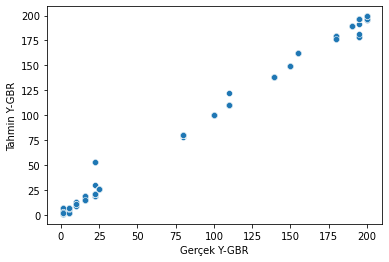

In [18]:
sbn.scatterplot(x = "Gerçek Y-GBR", y = "Tahmin Y-GBR", data = tahminDf)

In [19]:
# Metric Libraris

from sklearn.metrics import mean_absolute_error         # MAE 
from sklearn.metrics import mean_squared_error          # MSE 
                                                        # RMSE
from sklearn.metrics import mean_squared_log_error      # RMSLE
from sklearn.metrics import r2_score                    # R²  
from sklearn.metrics import mean_poisson_deviance       # MAPE
from sklearn import metrics

In [20]:
print('Mean Squared Error_gbregressor:', metrics.mean_squared_error(y_test, y_tahminGbr)) 
print('RSquared_gbregressor:', r2_score(y_test, y_tahminGbr))

Mean Squared Error_gbregressor: 5.195813597211726
RSquared_gbregressor: 0.9993139901548228


C:\Users\omerp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\omerp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


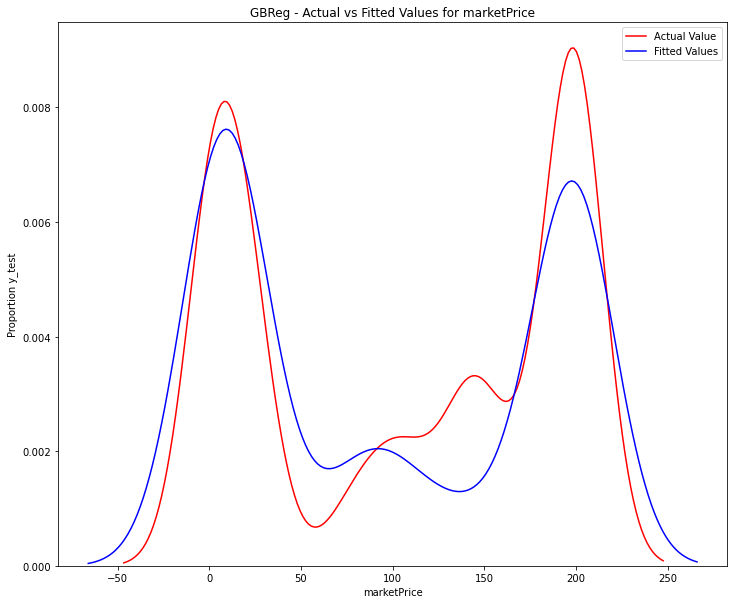

In [21]:
y_tahmin = gbregressor.predict(x_test)

width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sbn.distplot(dataFrameVerisi1['marketPrice'], hist=False, color="r", label="Actual Value")
sbn.distplot(y_tahmin, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('GBReg - Actual vs Fitted Values for marketPrice')
plt.xlabel('marketPrice')
plt.ylabel('Proportion y_test')
plt.legend()
plt.show()
plt.close()